## Importing the necessary libraries

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

import warnings
warnings.filterwarnings('ignore')
#Importing the necessary libraries

In [197]:
df = pd.read_csv("Valldolid_passmap.csv")
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


### Filtering the data according to Barcelona football club

In [198]:
df = df[df['teamId'] == 'Barcelona']
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [199]:
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#shift method is useful to shift the data as per the Index up or down.

In [200]:
passes = df[df['type'] == 'Pass']
successful = passes[passes['outcome'] == 'Successful']

#We are only using the data which is a pass and is successful to create our Pass Map.

In [201]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


## Looking for our first substitution of the game and creating the map according to that

In [202]:
subs = df[df['type'] == 'SubstitutionOff']
subs = subs['minute']
first_substi = subs.min()
first_substi

70

In [203]:
successful = successful[successful['minute'] < first_substi]

In [204]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


### converting the float values to Integer

In [205]:
new_passer = pd.to_numeric(successful['passer'], downcast='integer')
new_recipient = pd.to_numeric(successful['recipient'], downcast= 'integer')

successful['passer'] = new_passer
successful['recipient'] = new_recipient

successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8


In [206]:
formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
successful['position_abbreviation'] = successful['playerId'].map(formation_dict)
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient,position_abbreviation
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8,RDM
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21,LWB
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15,LW
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1,LCM
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2,RDM
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8,RB
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2,LWB
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8,RB


### Find the passes completed by each player with the help of grouping and aggregating the end value

In [207]:
avg_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
avg_locations.columns = ['x','y','count']
avg_locations 

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [208]:
passes_between = successful.groupby(['passer','recipient']).id.count().reset_index()
passes_between.rename({'id':'pass_count'}, axis = 1, inplace = True)

passes_between = passes_between.merge(avg_locations, left_on = 'passer', right_index = True)
passes_between = passes_between.merge(avg_locations, left_on = 'recipient', right_index = True, suffixes=['','_end'])

In [209]:
passes_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
18,4,2,1,32.895833,43.518750,48,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
52,15,10,1,38.409091,74.378182,55,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


### Looking at pass count more than 3 

In [210]:
pass_to_plyrs = passes_between[passes_between['pass_count'] > 3]
pass_to_plyrs.head()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
74,21,2,4,55.663636,52.263636,55,68.274359,11.915385,39
83,28,2,10,49.156863,16.282353,51,68.274359,11.915385,39
27,8,4,8,53.332927,41.608537,82,32.895833,43.518750,48


### Creating our Pass Map with Mlp soccer library

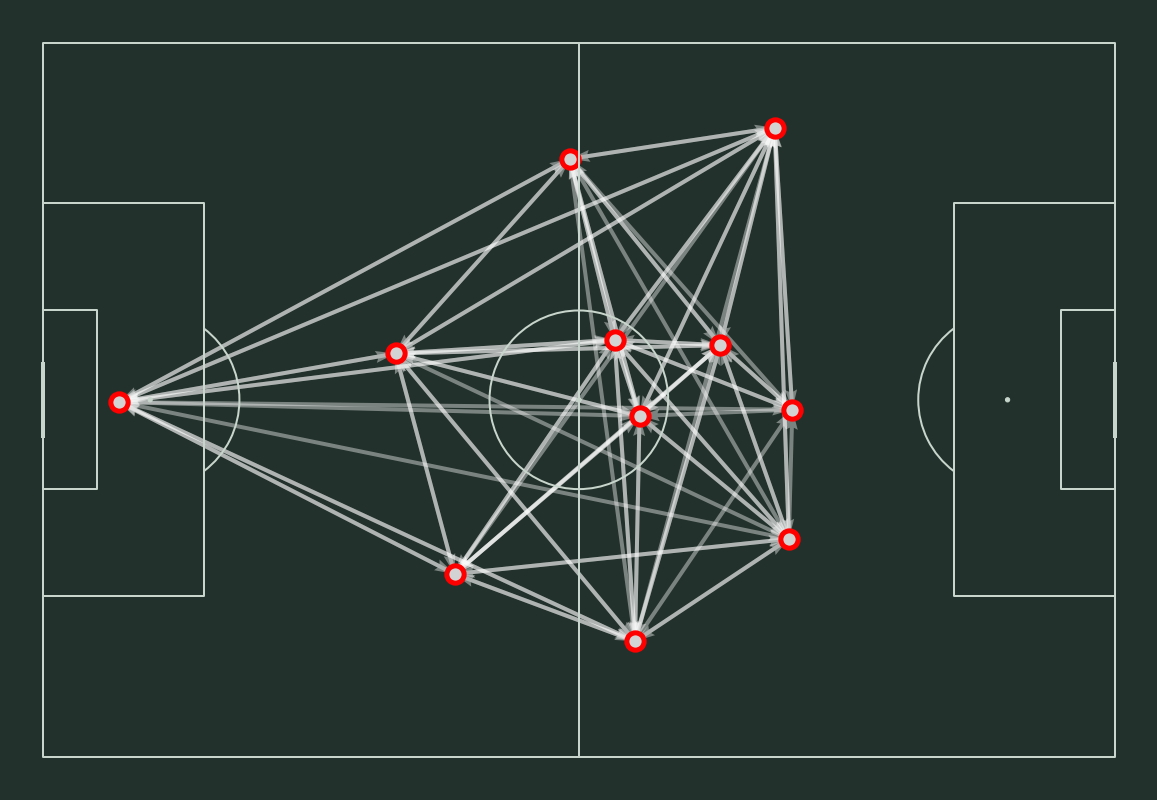

In [219]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16,11), constrained_layout =True, tight_layout=False)
fig.set_facecolor("#22312b")

arrow = pitch.arrows(1.2* passes_between.x, 0.8*passes_between.y, 1.2*passes_between.x_end,
                    0.8*passes_between.y_end, ax=ax, width = 4, headwidth =3, color ="white", zorder =0.8, alpha =0.4)

nodes = pitch.scatter(1.2*avg_locations.x, 0.8*avg_locations.y, 
                        s = 300, color = '#d3d3d3', edgecolors = 'red', linewidth = 5, alpha=1, zorder =0.8, ax=ax)


### As I am new to MPLSOCCER library, I'm still getting used to make the optimal use of this library by undertanding how can i add the position name to the node intersection and so on, as this can help me explain my analysis more.